<a href="https://colab.research.google.com/github/HumbertoMezaRuiz/FisicaComputacional1/blob/main/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
%matplotlib inline


In [6]:
#En resumen de la actividad anterior tenemos
url1 = "https://raw.githubusercontent.com/HumbertoMezaRuiz/FisicaComputacional1/main/Actividad5/26329.txt"#Definimos este link para usar el texo desde ahi

encabezado = ['Fecha','Precipit','Evap','Tmax','Tmin']#Definimos aqui los encabezados para tener mas orden al definir el df

#Ahora definimos nuestro df, donde como archivo pondremos el link url1 y en names, los encabezado definidos previamente
df_dist = pd.read_csv(url1, names=encabezado, encoding='cp1251', sep='\s+', skiprows=19, skipfooter=2, header=None, engine='python')

df_work0 = df_dist.copy()     #Hacemos una copia de nuestros datos para manipularlos sin miedo a perderlos

str_Nulo = 'Nulo'    #Aqui pondremos lo que querramos quitar, es decir, en mis datos hay datos que dicen 'nulos'

df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)        #Reemplazamos todos los nulos, en este caso, quedara en blanco

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precipit', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

df_work2 = df_work1.copy() #hacemos otra copia para hacer otro cambio

df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy() #Le decimos a python que esa columna son fehcas y le decimos que el primer numero son los dias

df_work2['Año'] = df_work2['Fecha'].dt.year  #Vamos a crear una columna con el año de las fechas

df_work2['Mes'] = df_work2['Fecha'].dt.month #y otras con el mes
 
############################################################################################################################################
df_meteo = df_work2.copy()# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos.
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     10716 non-null  datetime64[ns]
 1   Precipit  10715 non-null  float64       
 2   Evap      1706 non-null   float64       
 3   Tmax      10624 non-null  float64       
 4   Tmin      10626 non-null  float64       
 5   Año       10716 non-null  int64         
 6   Mes       10716 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 586.2 KB
       Fecha  Precipit  Evap  Tmax  Tmin   Año  Mes
0 1984-01-01       0.0   3.2  32.0   9.0  1984    1
1 1984-01-02       0.0   3.7  26.0  10.0  1984    1
2 1984-01-03       6.0   1.7  26.0  10.0  1984    1
3 1984-01-04      22.0   1.0  24.0  11.0  1984    1
4 1984-01-05       0.0   1.0  23.0  11.0  1984    1
           Fecha  Precipit  Evap  Tmax  Tmin   Año  Mes
10711 2016-03-26       0.0   NaN  30.0 

In [7]:
df_meteo_ts = df_meteo.copy() # Hacemos una copia para darle sin miedo

df_meteo_ts = df_meteo_ts.set_index('Fecha') # Con esto hacemos que en vez de enumerar las filas, sale directamente por fecha

df_meteo_ts.info()
print(df_meteo_ts.head())
print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10716 entries, 1984-01-01 to 2016-03-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Precipit  10715 non-null  float64
 1   Evap      1706 non-null   float64
 2   Tmax      10624 non-null  float64
 3   Tmin      10626 non-null  float64
 4   Año       10716 non-null  int64  
 5   Mes       10716 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 586.0 KB
            Precipit  Evap  Tmax  Tmin   Año  Mes
Fecha                                            
1984-01-01       0.0   3.2  32.0   9.0  1984    1
1984-01-02       0.0   3.7  26.0  10.0  1984    1
1984-01-03       6.0   1.7  26.0  10.0  1984    1
1984-01-04      22.0   1.0  24.0  11.0  1984    1
1984-01-05       0.0   1.0  23.0  11.0  1984    1
            Precipit  Evap  Tmax  Tmin   Año  Mes
Fecha                                            
2016-03-26       0.0   NaN  30.0  11.0  2016    3
2016-03-27 

**Actividad 1.** Explora tus datos de Precipitación los últimos años 1990- fin de datos.

*   Grafica todo el rango de datos utilizando la función df.plot()
*   Analiza un año específico completo, utiliza la función df.loc() para seleccionar el rango de datos.
*   Grafica la estacionalidad de tus datos por mes utilizando la función sns.barplot() 

In [11]:
# Vamos a utilizar los últimos 30 años de datos, que corresponden al periodo 1986-2016
df_30años = df_meteo_ts[(df_meteo_ts['Año'] >= 1986) & (df_meteo_ts['Año'] < 2017)]
df_30años.head()

,Precipit,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1987-01-01,0.0,2.9,28.0,7.0,1987,1
1987-01-02,0.0,5.0,28.0,7.0,1987,1
1987-01-03,0.0,5.0,30.0,9.0,1987,1
1987-01-04,0.0,6.7,28.0,7.0,1987,1
1987-01-05,0.0,5.4,30.0,8.0,1987,1


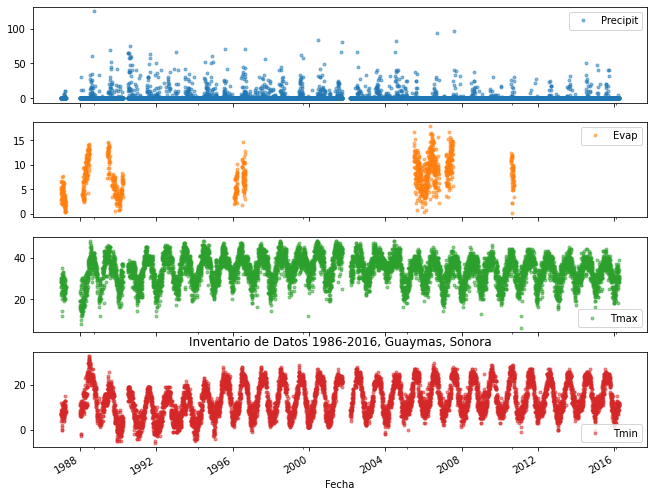

In [17]:
# Checamos la continuidad de datos, para ver si será viable usar ese periodo
cols_plot = ['Precipit', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']
axes = df_30años[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1986-2016, Guaymas, Sonora');

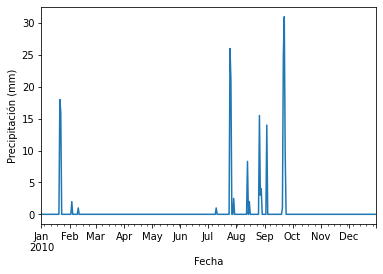

In [20]:
# Analizando la precipitación en el año 2010, usando la función df.loc() para filtrar un periodo
ax = df_30años.loc['2010', 'Precipit'].plot()
ax.set_ylabel('Precipitación (mm)');

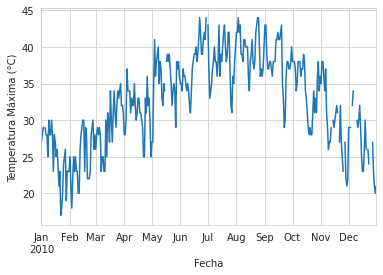

In [23]:
# Analizando la temp maxima en el año 2010, usando la función df.loc() para filtrar un periodo
ax = df_30años.loc['2010', 'Tmax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)');

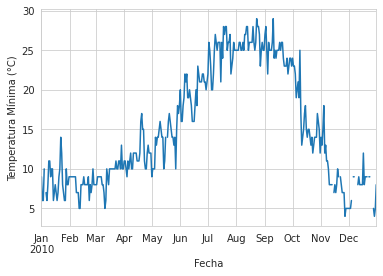

In [24]:
# Analizando la temp minima en el año 2010, usando la función df.loc() para filtrar un periodo
ax = df_30años.loc['2010', 'Tmin'].plot()
ax.set_ylabel('Temperatura Mínima (°C)');

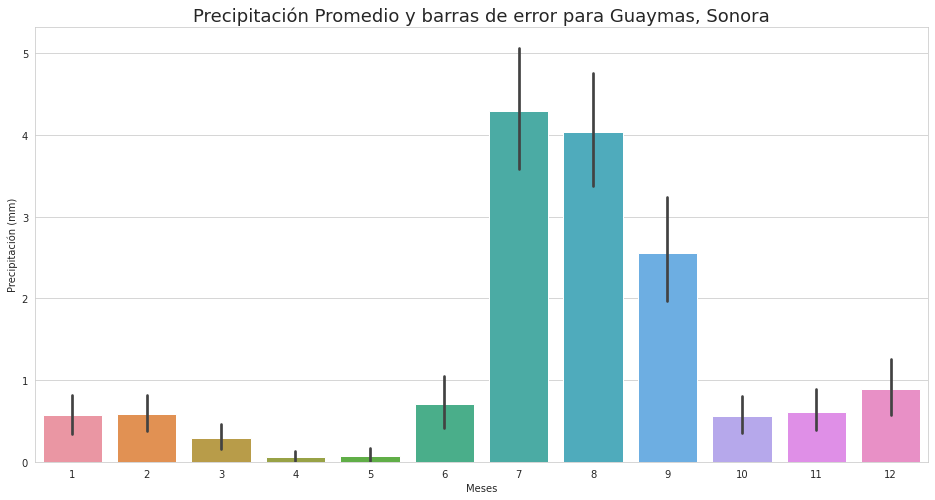

In [22]:
# Gráfica de Precipitación últimos 30 años agrupada por mes
sns.set_style('whitegrid')

# Para poner la gráfica más grande
plt.figure(figsize=(16,8))

# la gráfica
g =sns.barplot(x='Mes', y='Precipit', data=df_30años);

#Etiquetas
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guaymas, Sonora', fontsize=18)

plt.show()

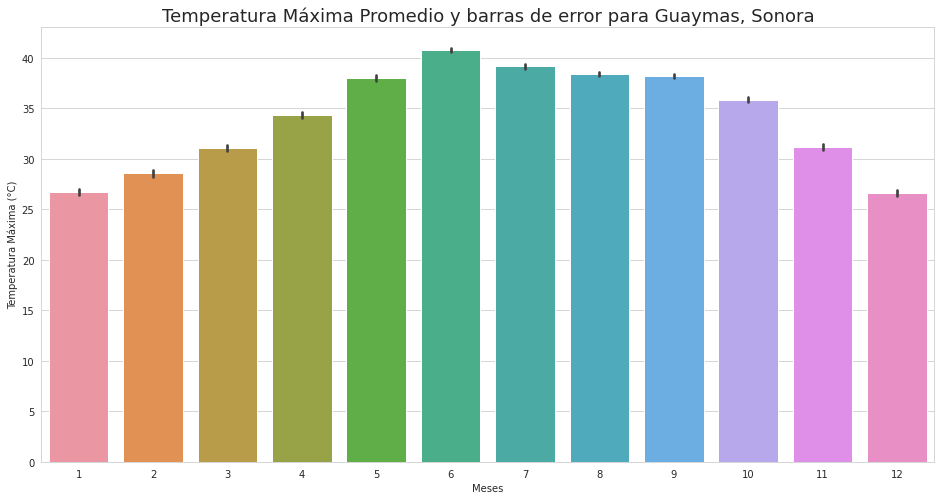

In [28]:
# Gráfica de Temp Máximas últimos 30 años agrupada por mes
sns.set_style('whitegrid')

# Para poner la gráfica más grande
plt.figure(figsize=(16,8))

# la gráfica
g =sns.barplot(x='Mes', y='Tmax', data=df_30años);

#Etiquetas
plt.xlabel('Meses')
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Temperatura Máxima Promedio y barras de error para Guaymas, Sonora', fontsize=18)

plt.show()

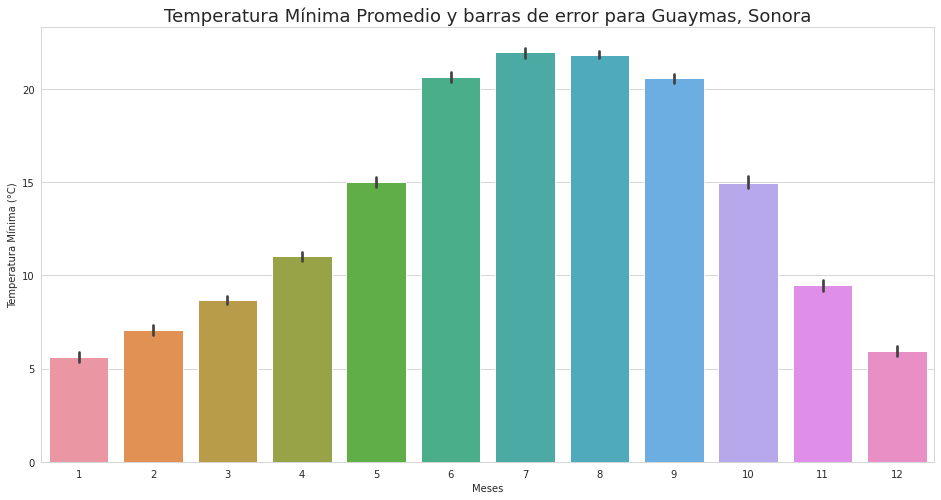

In [29]:
# Gráfica de Temp Mínimas últimos 30 años agrupada por mes
sns.set_style('whitegrid')

# Para poner la gráfica más grande
plt.figure(figsize=(16,8))

# la gráfica
g =sns.barplot(x='Mes', y='Tmin', data=df_30años);

#Etiquetas
plt.xlabel('Meses')
plt.ylabel('Temperatura Mínima (°C)')
plt.title('Temperatura Mínima Promedio y barras de error para Guaymas, Sonora', fontsize=18)

plt.show()

**Actividad 2.** Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990.  Trata de construir dos subgráficas contiguas. 

* Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. 
* Analiza un año específico completo para las dos Temperaturas, con apoyo de la función df.loc() 
* Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.  